In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
colors = ["#6eccf4", "#F9A124"]

In [18]:
df1 = pd.read_excel("./data/without.xlsx")
df2 = pd.read_excel("./data/with.xlsx")

In [19]:
df2

,Timestamp,Your name,"While I was reading the narrative, I could easily picture the events in it taking place.","While I was reading the narrative, activity going on in the room around me was on my mind.",I could picture myself in the scene of the events described in the narrative.,I was mentally involved in the narrative while reading it.,"After finishing the narrative, I found it easy to put it out of my mind.",I wanted to learn how the narrative ended.,The narrative affected me emotionally.,I found myself thinking of ways the narrative could have turned out differently.,...,I think that I would like to use this system frequently,I found the system unnecessarily complex,I thought the system was easy to use,I think that I would need the support of a technical person to be able to use this system,I found the various functions in this system were well integrated,I thought there was too much inconsistency in this system,I would imagine that most people would learn to use this system very quickly,I found the system very cumbersome to use,I felt very confident using the system,I needed to learn a lot of things before I could get going with this system
0,2023-12-25 10:42:59.789,Qixin Hu,5,5,5,5,5,1,1,5,...,1,1,4,1,3,3,5,1,5,1
1,2023-12-25 15:33:37.805,Chenghao Shi,6,6,5,6,5,7,6,6,...,3,1,5,1,4,2,5,1,4,1
2,2023-12-25 22:45:30.442,Xiaojing Lin,6,6,5,6,5,5,5,5,...,3,2,4,3,4,3,4,2,4,3
3,2023-12-25 23:57:36.628,WANG Yinming,4,7,7,7,7,7,7,7,...,5,4,4,3,3,3,1,4,4,5
4,2023-12-26 15:08:33.646,Yifan Cai,4,3,3,4,3,3,3,5,...,3,4,3,2,3,3,4,4,3,2
5,2023-12-26 17:38:01.157,Yiren Liu,6,5,6,7,4,6,5,7,...,4,2,4,3,3,3,5,2,5,1
6,2023-12-27 09:18:27.113,Zekai Dong,6,6,6,6,3,6,4,5,...,4,2,4,2,4,2,5,1,4,1
7,2023-12-27 09:21:17.085,Hanlin Shi,6,4,5,5,5,7,5,7,...,2,2,1,1,1,5,4,2,2,1
8,2023-12-27 14:45:09.457,Anoushka,6,4,5,4,3,6,2,5,...,3,1,4,1,4,2,4,2,4,2
9,2023-12-27 15:32:58.296,Jin Ding,6,6,6,7,3,7,6,7,...,5,2,5,2,4,1,5,1,5,1


In [20]:
questions = list(df1.columns[2:-2])
df1 = df1[questions]
df2 = df2[questions]
revsered_questions = ["While I was reading the narrative, activity going on in the room around me was on my mind.",
                     "I found my mind wandering while reading the narrative."]
words_questions = ['Which plot of this story prompted you to reflect on the handling of events in your past experience, and how did it promote it? What exactly happened?',
                     'What plot of this story prompted you to think about how you can deal with people in the future? Which plots and how were they promoted?']
df2[revsered_questions[0]] = df2[revsered_questions[0]].apply(lambda x:8-x)
df2[revsered_questions[1]] = df2[revsered_questions[1]].apply(lambda x:8-x)


questions1 = [
 'I found myself thinking of ways the narrative could have turned out differently.',
 'I wanted to learn how the narrative ended.',
 'While I was reading the narrative, I could easily picture the events in it taking place.',
  'I could picture myself in the scene of the events described in the narrative.',
  'After finishing the narrative, I found it easy to put it out of my mind.',
  'I was mentally involved in the narrative while reading it.',
  'The narrative affected me emotionally.',
  'While I was reading the narrative, activity going on in the room around me was on my mind.',           
 'I found my mind wandering while reading the narrative.',
 'The events in the narrative are relevant to my everyday life.',
 'The events in the narrative have changed my life.']

questions2 = ['Self-Perceptions',
 'Motivation',
 'Perseverance',
 'Self-Control',
 'Metacognitive Strategies',
 'Social Competencies',
 'Resilience and Coping',
 'Creativity']

/var/folders/y8/nrm8nkzx76164npfy0g513nm0000gn/T/ipykernel_4090/4222246877.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[revsered_questions[0]] = df2[revsered_questions[0]].apply(lambda x:8-x)
/var/folders/y8/nrm8nkzx76164npfy0g513nm0000gn/T/ipykernel_4090/4222246877.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[revsered_questions[1]] = df2[revsered_questions[1]].apply(lambda x:8-x)


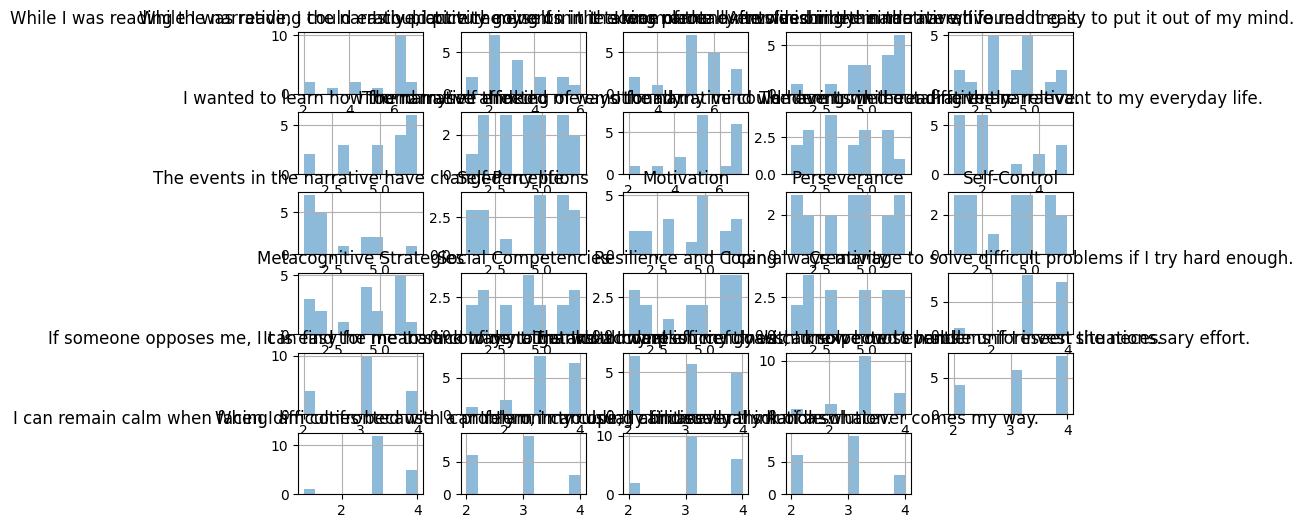

In [6]:
df2.hist(alpha=0.5, figsize=(10, 6))
plt.show()

# tests

对于比较对照组和实验组在量表数据（程度从1到7）上的差异，可以使用以下几种统计检验方法：

(1)独立样本t检验（Independent Samples t-Test）：如果你的数据满足正态分布，并且两组的方差相等（可以用Levene's Test检验方差齐性），那么可以使用独立样本t检验。这种检验适用于比较两组独立样本的平均值。

(2)Mann-Whitney U检验：如果你的数据不满足正态分布，可以使用Mann-Whitney U检验，这是一种非参数检验，用于比较两个独立样本的中位数。

(3)Wilcoxon秩和检验：这也是一种非参数检验，适用于当数据不满足正态分布时，比较两个相关或配对样本的差异。

(4)方差分析（ANOVA）：如果你的实验设计包括多于两个组，可以考虑使用单因素或多因素方差分析。如果数据不满足正态分布，可以考虑使用Kruskal-Wallis H检验（多个独立样本的非参数检验方法）。

在选择检验方法时，需要考虑数据的分布特性（是否正态分布）、样本的独立性、以及样本大小。如果不确定哪种检验最合适，可以先进行数据的描述性统计和正态性检验。同时，也可以考虑咨询统计专家。

In [7]:
test_methods = {"t-test":stats.ttest_ind, "Mann-Whitney":stats.mannwhitneyu, "wilcoxon":stats.wilcoxon}

# Non-cognative skills

[3.44444444 3.55555556 3.77777778 3.61111111 3.44444444 3.66666667
 3.55555556 4.11111111 3.44444444]   [0.0, 0.7853981633974483, 1.5707963267948966, 2.356194490192345, 3.141592653589793, 3.9269908169872414, 4.71238898038469, 5.497787143782138, 0.0]
[4.27777778 4.27777778 4.05555556 3.94444444 4.05555556 4.05555556
 4.44444444 4.05555556 4.27777778]   [0.0, 0.7853981633974483, 1.5707963267948966, 2.356194490192345, 3.141592653589793, 3.9269908169872414, 4.71238898038469, 5.497787143782138, 0.0]


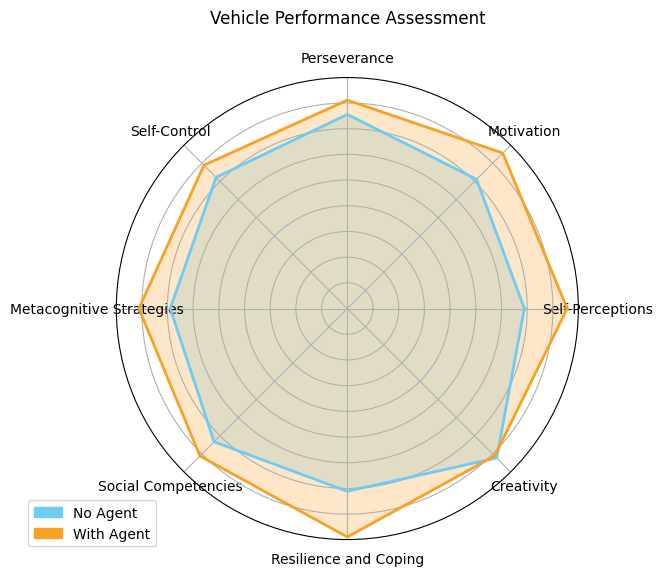

In [10]:
qs = ['Self-Perceptions',
 'Motivation',
 'Perseverance',
 'Self-Control',
 'Metacognitive Strategies',
 'Social Competencies',
 'Resilience and Coping',
 'Creativity']
labels=np.array(qs)
data1=[df1[q].mean() for q in qs]
data2=[df2[q].mean() for q in qs]
# data2=np.array([df_nar_sage["Narrativity_Overall"].mean(),
#                 df_nar_sage["Narrativity_Staging"].mean(),
#                 df_nar_sage["Narrativity_PlotProg"].mean(),
#                 df_nar_sage["Narrativity_CogTension"].mean(),
#                ])


def draw_radar(labels, *datas):
    # Create radar plot
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
    angles+=angles[:1]

    # The plot is circular, so we need to "complete the loop" and append the start to the end.
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    count = 0
    for data in datas:
        count += 1
        processed_data=np.concatenate((data,[data[0]]))
        
        print(processed_data, " ", angles)
        ax.fill(angles, processed_data, color=colors[count-1], alpha=0.25)
        ax.plot(angles, processed_data, color=colors[count-1], linewidth=2)  # Change the color if needed



    # Labels for each point
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Title of the plot
    ax.set_title('Vehicle Performance Assessment', y=1.1)

    legend_patches = [
        mpatches.Patch(color=colors[0], label='No Agent'),
        mpatches.Patch(color=colors[1], label='With Agent')
    ]
    ax.legend(handles=legend_patches, loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()
draw_radar(labels, data1, data2)

/var/folders/y8/nrm8nkzx76164npfy0g513nm0000gn/T/ipykernel_4090/1968392846.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  right = max(bar1[i].get_width() + std_a[i], bar2[i].get_width() + std_b[i])


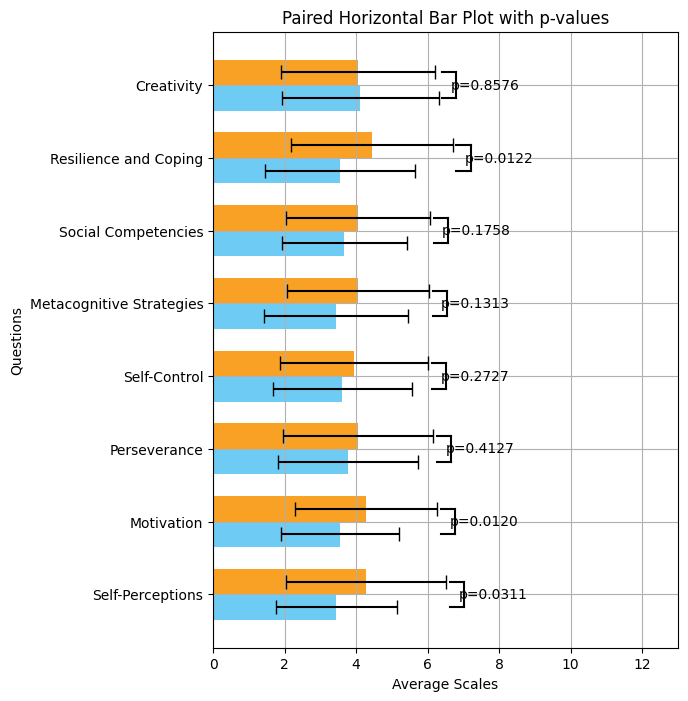

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def draw_p_value(df1, df2, columns, test_method, margin_side=None, legends=["Group A", "Group B"], xlim = (0,9), horizontal_height=0.3):
    categories = columns
    values_a = df1[columns].mean()
    values_b = df2[columns].mean()
    std_a =  df1[columns].std()
    std_b =  df2[columns].std()

    # P-values for each pair of bars
    p_values = []
    for q in columns:
        t_statistic, p_value = test_method(df1[q], df2[q])
        p_values.append(p_value)

    plt.figure(figsize=(6, 8))
    plt.xlim(xlim[0], xlim[1])
        
    # The y position of bars
    bar_height = 0.35
    index = np.arange(len(categories))

    # Plotting the horizontal bars with error bars
    bar1 = plt.barh(index, values_a, bar_height, label=legends[0], xerr=std_a, capsize=5,  color=colors[0])
    bar2 = plt.barh(index + bar_height, values_b, bar_height, label=legends[1], xerr=std_b, capsize=5,  color=colors[1])

    # Adding labels and title
    plt.ylabel('Questions')
    plt.xlabel('Average Scales')
    plt.title('Paired Horizontal Bar Plot with p-values')
    plt.yticks(index + bar_height / 2, categories)
    # plt.legend()

    # Function to add p-value annotations with small vertical lines
    if margin_side == None:
        margin_side = max(max(std_a), max(std_b)) * 1.5
    def add_pvalue_annotations(bar1, bar2, p_values):
        for i in range(len(bar1)):
            bar1_y = bar1[i].get_y() + bar1[i].get_height() / 2
            bar2_y = bar2[i].get_y() + bar2[i].get_height() / 2
            center_y = (bar1_y + bar2_y) / 2
            right = max(bar1[i].get_width() + std_a[i], bar2[i].get_width() + std_b[i])
            p = p_values[i]

            # Draw the small vertical line at each end
            plt.plot([right + margin_side, right + margin_side - horizontal_height], [bar1_y, bar1_y], color='black')
            plt.plot([right + margin_side, right + margin_side - horizontal_height], [bar2_y, bar2_y], color='black')

            # Connect the vertical lines with a horizontal line
            plt.plot([right + margin_side, right + margin_side], [bar1_y, bar2_y], color='black')

            # Add the p-value text
            plt.text(right + margin_side + 2 * horizontal_height, center_y, f'p={p:.4f}', ha='center', va='center')

    # Add p-value annotations with small vertical lines
    add_pvalue_annotations(bar1, bar2, p_values)

    # Show the plot
    plt.grid(True)
    plt.show()


draw_p_value(df1, df2, questions2, stats.wilcoxon, 0.5, legends=["With Agent", "Without Agent"], xlim=(0,13), horizontal_height=0.4)

# self-rating

In [12]:
df1[questions1].std()

While I was reading the narrative, I could easily picture the events in it taking place.      1.640979
While I was reading the narrative, activity going on in the room around me was on my mind.    1.756408
I could picture myself in the scene of the events described in the narrative.                 1.719743
I was mentally involved in the narrative while reading it.                                    1.748949
After finishing the narrative, I found it easy to put it out of my mind.                      1.940285
I wanted to learn how the narrative ended.                                                    1.936914
The narrative affected me emotionally.                                                        1.363626
I found myself thinking of ways the narrative could have turned out differently.              1.790498
I found my mind wandering while reading the narrative.                                        1.465285
The events in the narrative are relevant to my everyday life.            

['I found myself thinking of ways the narrative could have turned out differently.', 'I wanted to learn how the narrative ended.', 'While I was reading the narrative, I could easily picture the events in it taking place.', 'I could picture myself in the scene of the events described in the narrative.', 'After finishing the narrative, I found it easy to put it out of my mind.', 'I was mentally involved in the narrative while reading it.', 'The narrative affected me emotionally.', 'While I was reading the narrative, activity going on in the room around me was on my mind.', 'I found my mind wandering while reading the narrative.', 'The events in the narrative are relevant to my everyday life.', 'The events in the narrative have changed my life.']


/var/folders/y8/nrm8nkzx76164npfy0g513nm0000gn/T/ipykernel_4090/1039080009.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  right = max(bar1[i].get_width() + std_a[i], bar2[i].get_width() + std_b[i])


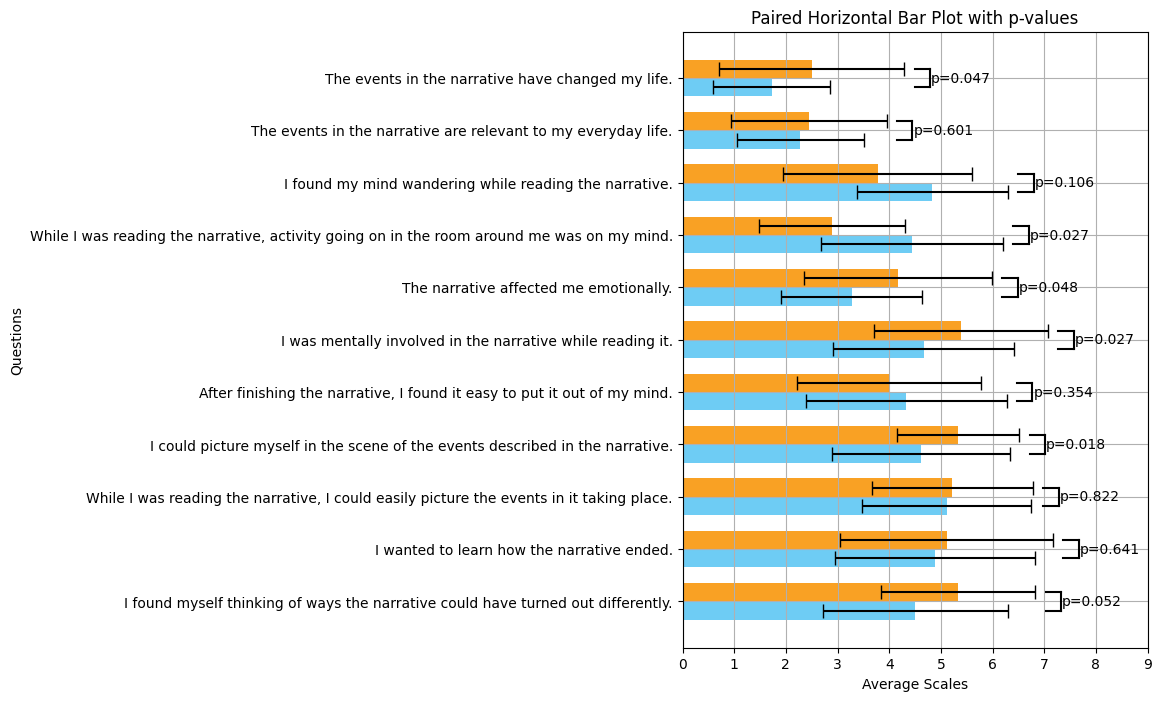

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def draw_p_value(df1, df2, columns, test_method, margin_side=None, legends=["Group A", "Group B"], xlim = (0,9), horizontal_height=0.3):
    categories = columns
    print(categories)
    values_a = df1[columns].mean()
    values_b = df2[columns].mean()
    std_a =  df1[columns].std()
    std_b =  df2[columns].std()

    # P-values for each pair of bars
    p_values = []
    for q in columns:
        t_statistic, p_value = test_method(df1[q], df2[q])
        p_values.append(p_value)

    plt.figure(figsize=(6, 8))
    plt.xlim(xlim[0], xlim[1])
        
    # The y position of bars
    bar_height = 0.35
    index = np.arange(len(categories))

    # Plotting the horizontal bars with error bars
    bar1 = plt.barh(index, values_a, bar_height, label=legends[0], xerr=std_a, capsize=5,  color=colors[0])
    bar2 = plt.barh(index + bar_height, values_b, bar_height, label=legends[1], xerr=std_b, capsize=5,  color=colors[1])

    # Adding labels and title
    plt.ylabel('Questions')
    plt.xlabel('Average Scales')
    plt.title('Paired Horizontal Bar Plot with p-values')
    plt.yticks(index + bar_height / 2, categories)
    # plt.legend()

    # Function to add p-value annotations with small vertical lines
    if margin_side == None:
        margin_side = max(max(std_a), max(std_b)) * 1.5
    def add_pvalue_annotations(bar1, bar2, p_values):
        for i in range(len(bar1)):
            bar1_y = bar1[i].get_y() + bar1[i].get_height() / 2
            bar2_y = bar2[i].get_y() + bar2[i].get_height() / 2
            center_y = (bar1_y + bar2_y) / 2
            right = max(bar1[i].get_width() + std_a[i], bar2[i].get_width() + std_b[i])
            p = p_values[i]

            # Draw the small vertical line at each end
            plt.plot([right + margin_side, right + margin_side - horizontal_height], [bar1_y, bar1_y], color='black')
            plt.plot([right + margin_side, right + margin_side - horizontal_height], [bar2_y, bar2_y], color='black')

            # Connect the vertical lines with a horizontal line
            plt.plot([right + margin_side, right + margin_side], [bar1_y, bar2_y], color='black')

            # Add the p-value text
            plt.text(right + margin_side + 2 * horizontal_height, center_y, f'p={p:.3f}', ha='center', va='center')

    # Add p-value annotations with small vertical lines
    add_pvalue_annotations(bar1, bar2, p_values)

    # Show the plot
    plt.grid(True)
    plt.show()

draw_p_value(df1, df2, questions1, stats.wilcoxon, 0.5, legends=["With Agent", "Without Agent"])

In [26]:
# t_test
def test_p(column_name, test_method):
    control_group, experimental_group = df1[column_name], df2[column_name]
    t_statistic, p_value = test_method(control_group, experimental_group)
    return t_statistic, p_value 

def stats_df(test_method):
    statistics = []
    p_values = []
    for i in range(len(questions)):
        statistic, p_value = test_p(questions[i], test_method)
        statistics.append(statistic)
        p_values.append(p_value)
        # print(questions[i])
        # print("   statistic:", t_statistic, "   p_value:", p_value)
        # print()
    df_test = pd.DataFrame({"question":questions,"statistics":statistics, "p_values":p_values})
    return df_test

# df_u_test = stats_df(stats.mannwhitneyu)
df_u_test = stats_df(stats.wilcoxon)
df_u_test

,question,statistics,p_values
0,"While I was reading the narrative, I could eas...",30.5,0.822275
1,"While I was reading the narrative, activity go...",17.5,0.027124
2,I could picture myself in the scene of the eve...,16.5,0.018258
3,I was mentally involved in the narrative while...,15.0,0.026617
4,"After finishing the narrative, I found it easy...",38.0,0.354253
5,I wanted to learn how the narrative ended.,23.0,0.641214
6,The narrative affected me emotionally.,21.5,0.047816
7,I found myself thinking of ways the narrative ...,14.5,0.051742
8,I found my mind wandering while reading the na...,27.0,0.106358
9,The events in the narrative are relevant to my...,32.5,0.601459
